In [20]:
!pip install autoviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 69.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 5.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 50.4 MB/s eta 0:00:00:00:01
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.0.3
    Uninstalling xgboost-2.0.3:
      Successfully uninstalled xgboost-2.0.3
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERROR: pip's de

In [23]:
from autoviz import data_cleaning_suggestions
from autoviz import AutoViz_Class

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

import requests
import holidays
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve, cross_val_score
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [16]:
train = pd.read_csv("/kaggle/input/playground-series-s5e1/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s5e1/test.csv")
sub = pd.read_csv("/kaggle/input/playground-series-s5e1/sample_submission.csv")

# EDA

In [17]:
train.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [24]:
data_cleaning_suggestions(train)

    All variables classified into correct types.


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
id,int64,0.000000,100,0.000000,230129.000000,Possible ID column: drop before modeling step.
date,object,0.000000,1,,,No issue
country,object,0.000000,0,,,No issue
store,object,0.000000,0,,,No issue
product,object,0.000000,0,,,No issue
num_sold,float64,3.854778,NA,5.000000,5939.000000,"8871 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 6630 outliers greater than upper bound (2456.50) or lower than lower bound(-1123.50). Cap them or remove them."


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
id,int64,0.000000,100,0.0,230129.0,Possible ID column: drop before modeling step.
date,object,0.000000,1,,,No issue
country,object,0.000000,0,,,No issue
store,object,0.000000,0,,,No issue
product,object,0.000000,0,,,No issue
num_sold,float64,3.854778,NA,5.0,5939.0,"8871 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 6630 outliers greater than upper bound (2456.50) or lower than lower bound(-1123.50). Cap them or remove them."


In [25]:
data_cleaning_suggestions(test)

    All variables classified into correct types.


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
id,int64,0.000000,100,230130.000000,328679.000000,Possible ID column: drop before modeling step.
date,object,0.000000,1,,,No issue
country,object,0.000000,0,,,No issue
store,object,0.000000,0,,,No issue
product,object,0.000000,0,,,No issue


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
id,int64,0.0,100,230130.0,328679.0,Possible ID column: drop before modeling step.
date,object,0.0,1,,,No issue
country,object,0.0,0,,,No issue
store,object,0.0,0,,,No issue
product,object,0.0,0,,,No issue


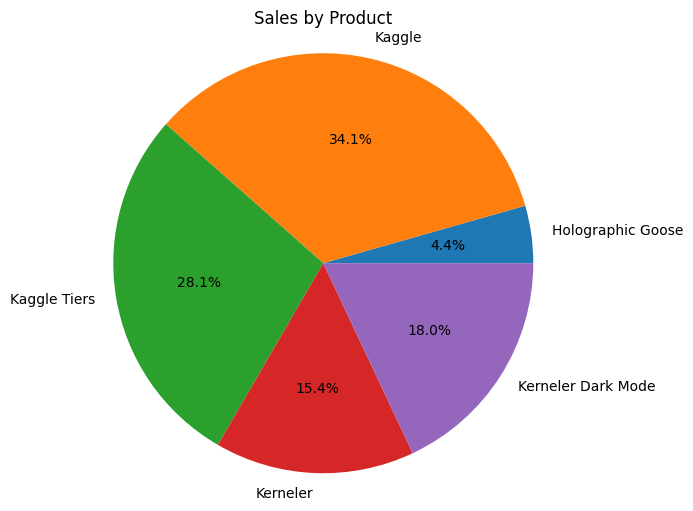

In [4]:
product_sales = train.groupby('product')['num_sold'].sum()
plt.figure(figsize=(8, 6))
plt.pie(product_sales.values, labels=product_sales.index, autopct='%1.1f%%')
plt.title('Sales by Product')
plt.axis('equal')
plt.show()

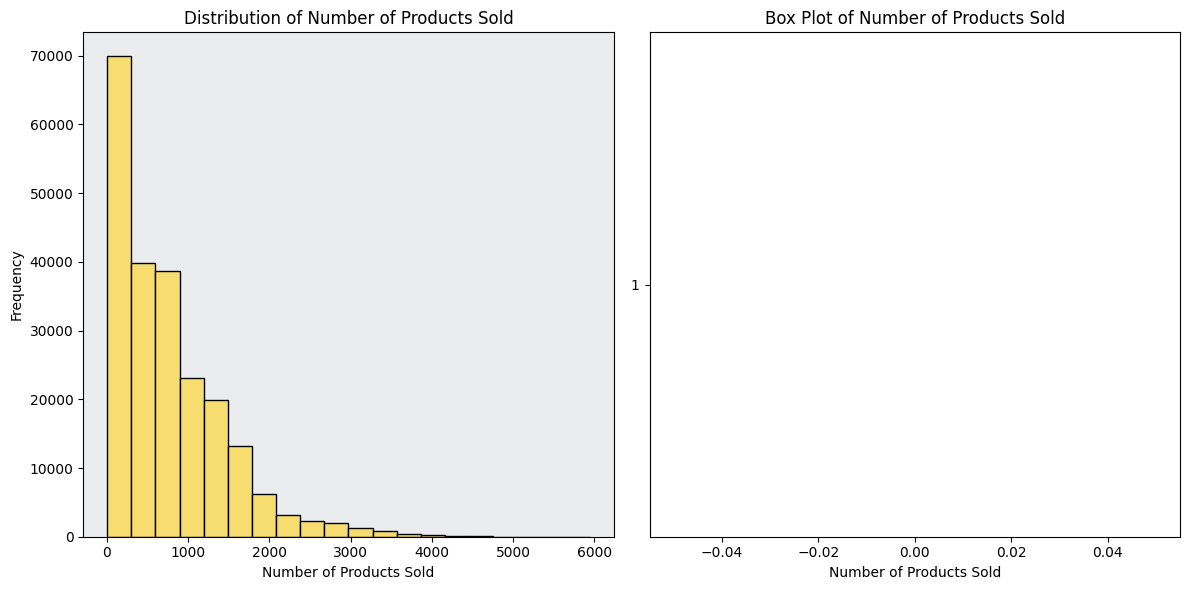

In [5]:
num_sold_data = train['num_sold']
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].hist(num_sold_data, bins=20, edgecolor='k', color='#F7DC6F')
axes[0].set_xlabel('Number of Products Sold')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Number of Products Sold')
axes[0].set_facecolor('#EAECEE')

axes[1].boxplot(num_sold_data, vert=False, patch_artist=True, boxprops=dict(facecolor='#F7DC6F'))
axes[1].set_xlabel('Number of Products Sold')
axes[1].set_title('Box Plot of Number of Products Sold')
plt.tight_layout()
plt.show()

In [6]:
country_group = train.groupby('country').agg({'num_sold': ['sum', 'mean']})
store_group = train.groupby('store').agg({'num_sold': ['sum', 'mean']})
product_group = train.groupby('product').agg({'num_sold': ['sum', 'mean']})

print("Grouped by 'country':")
print(country_group)

print("\nGrouped by 'store':")
print(store_group)

print("\nGrouped by 'product':")
print(product_group)

Grouped by 'country':
             num_sold             
                  sum         mean
country                           
Canada     28653095.0   840.045003
Finland    28698872.0   748.243306
Italy      20797669.0   542.241403
Kenya        689141.0    20.431100
Norway     54562305.0  1422.560422
Singapore  33102374.0   863.052379

Grouped by 'store':
                        num_sold            
                             sum        mean
store                                       
Discount Stickers     30599237.0  427.775887
Premium Sticker Mart  73703822.0  973.836240
Stickers for Less     62200397.0  840.046418

Grouped by 'product':
                      num_sold             
                           sum         mean
product                                    
Holographic Goose    7350368.0   197.484363
Kaggle              56721733.0  1232.384587
Kaggle Tiers        46870306.0  1018.344110
Kerneler            25596840.0   556.913102
Kerneler Dark Mode  29964209.0   651.0420

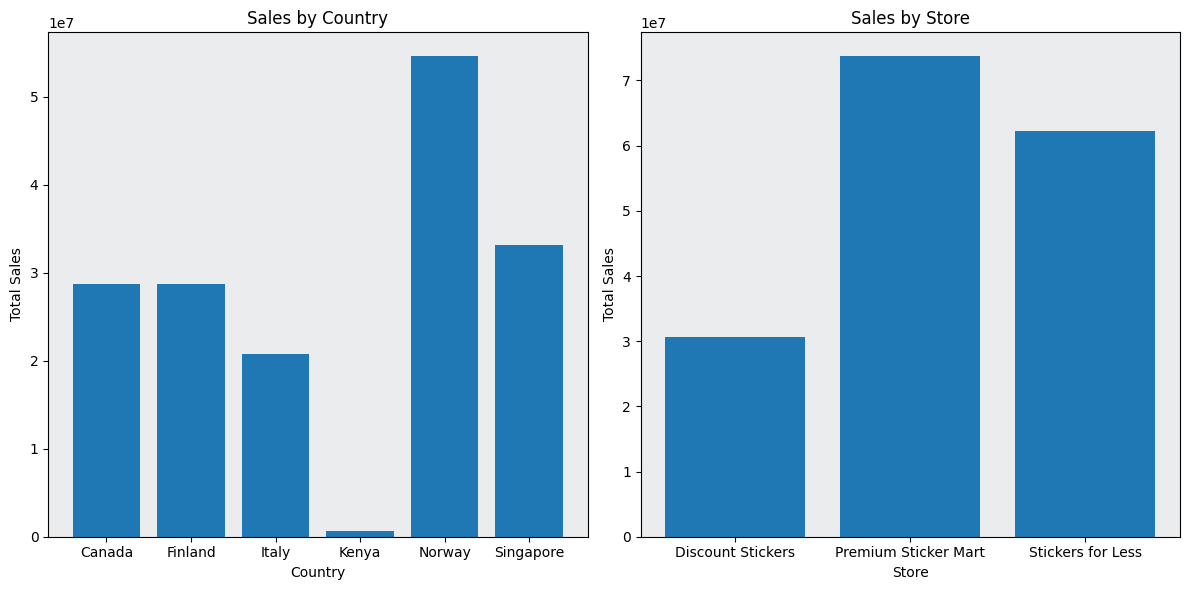

In [7]:
country_sales = train.groupby('country')['num_sold'].sum()
store_sales = train.groupby('store')['num_sold'].sum()
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].bar(country_sales.index, country_sales.values)
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Total Sales')
axes[0].set_title('Sales by Country')
axes[0].set_facecolor('#EAECEE')

axes[1].bar(store_sales.index, store_sales.values)
axes[1].set_xlabel('Store')
axes[1].set_ylabel('Total Sales')
axes[1].set_title('Sales by Store')
axes[1].set_facecolor('#EAECEE')

plt.tight_layout()
plt.show()

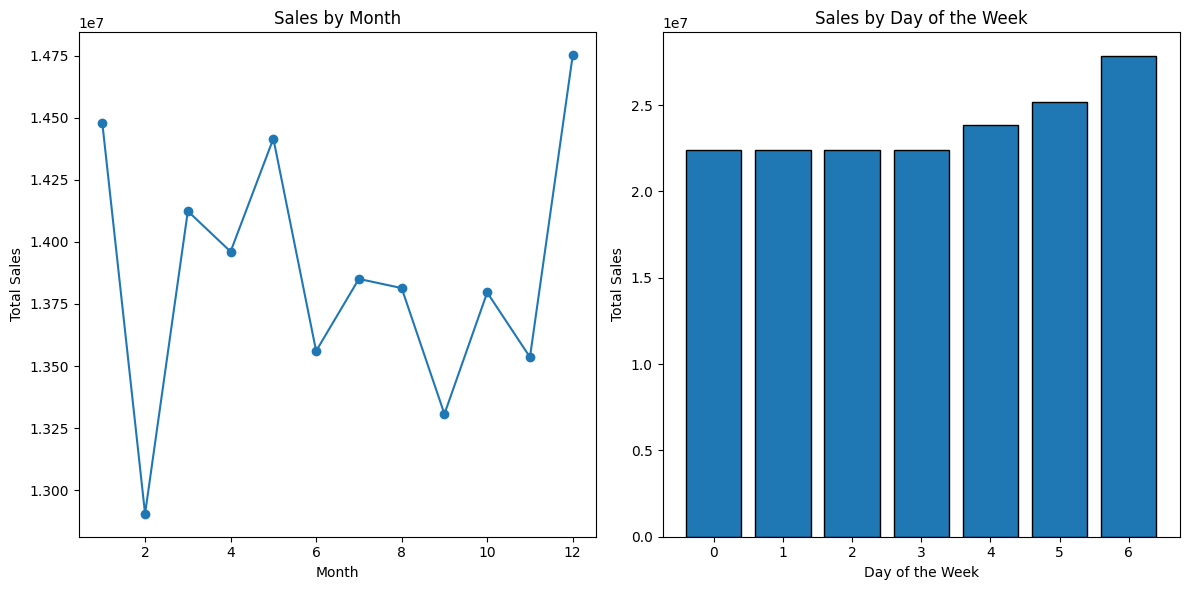

In [8]:
train_copy = train.copy()

train_copy['month'] = pd.to_datetime(train_copy['date']).dt.month
train_copy['day_of_week'] = pd.to_datetime(train_copy['date']).dt.dayofweek

monthly_sales = train_copy.groupby('month')['num_sold'].sum()
day_of_week_sales = train_copy.groupby('day_of_week')['num_sold'].sum()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].plot(monthly_sales.index, monthly_sales.values, marker='o')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Total Sales')
axes[0].set_title('Sales by Month')
axes[1].bar(day_of_week_sales.index, day_of_week_sales.values, edgecolor='k')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Total Sales')
axes[1].set_title('Sales by Day of the Week')
axes[1].set_xticks(range(7))

plt.tight_layout()
plt.show()

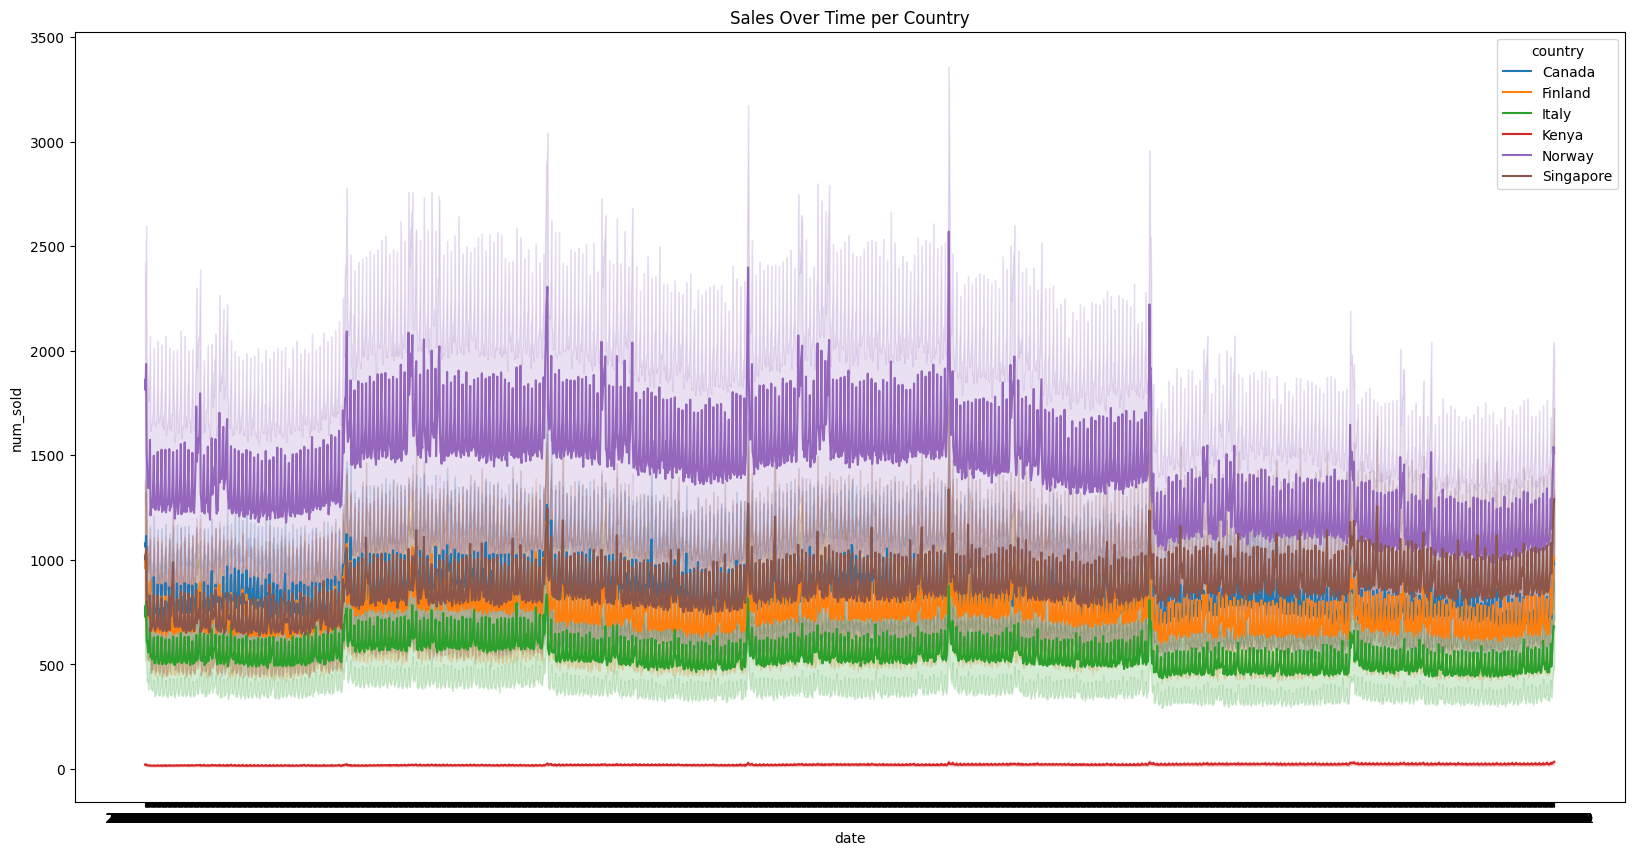

In [19]:
plt.figure(figsize = (20, 10))
sns.lineplot(data = train, x = 'date', y = 'num_sold', hue = 'country')    
plt.title('Sales Over Time per Country')
plt.show()

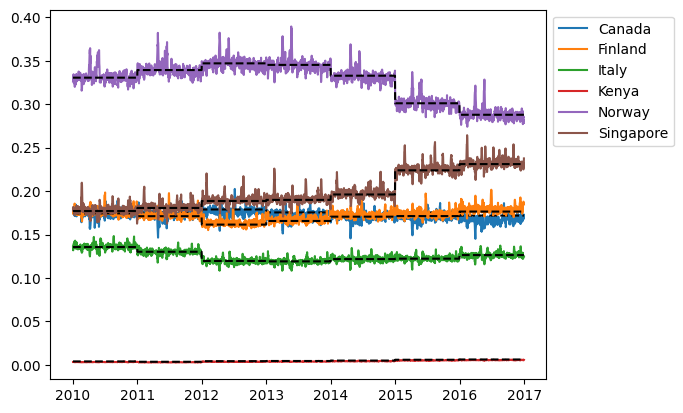

In [12]:
train['date'] = pd.to_datetime(train['date'])
def get_gdp_per_capita(country,year):
    alpha3 = {
        'Canada': 'CAN',
        'Finland': 'FIN',
        'Italy': 'ITA',
        'Kenya': 'KEN',
        'Norway': 'NOR',
        'Singapore': 'SGP'
    }
    url="https://api.worldbank.org/v2/country/{0}/indicator/NY.GDP.PCAP.CD?date={1}&format=json".format(alpha3[country],year)
    response = requests.get(url).json()
    return response[1][0]['value']

gdp = []
for country in train.country.unique():
    row = []
    for year in range(2010,2017):
        row.append(get_gdp_per_capita(country,year))
    gdp.append(row)

gdp = np.array(gdp)
gdp /= np.sum(gdp,axis=0)

rel_gdp_df = pd.DataFrame(gdp,index=train.country.unique(),columns=range(2010,2017))

df = train.groupby(['date','country'])[['num_sold']].sum().reset_index().join(
                        train.groupby('date')[['num_sold']].sum(), on='date',rsuffix='_total')
df['fractions'] = df['num_sold']/df['num_sold_total']
df['rel_gdp'] = df.apply(lambda s: rel_gdp_df.loc[s.country,s.date.year],axis=1)

for country in df['country'].unique():
    X = df[df['country']==country]
    plt.plot(X['date'],X['fractions'],label=country)
    plt.plot(X['date'],X['rel_gdp'],'k--')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

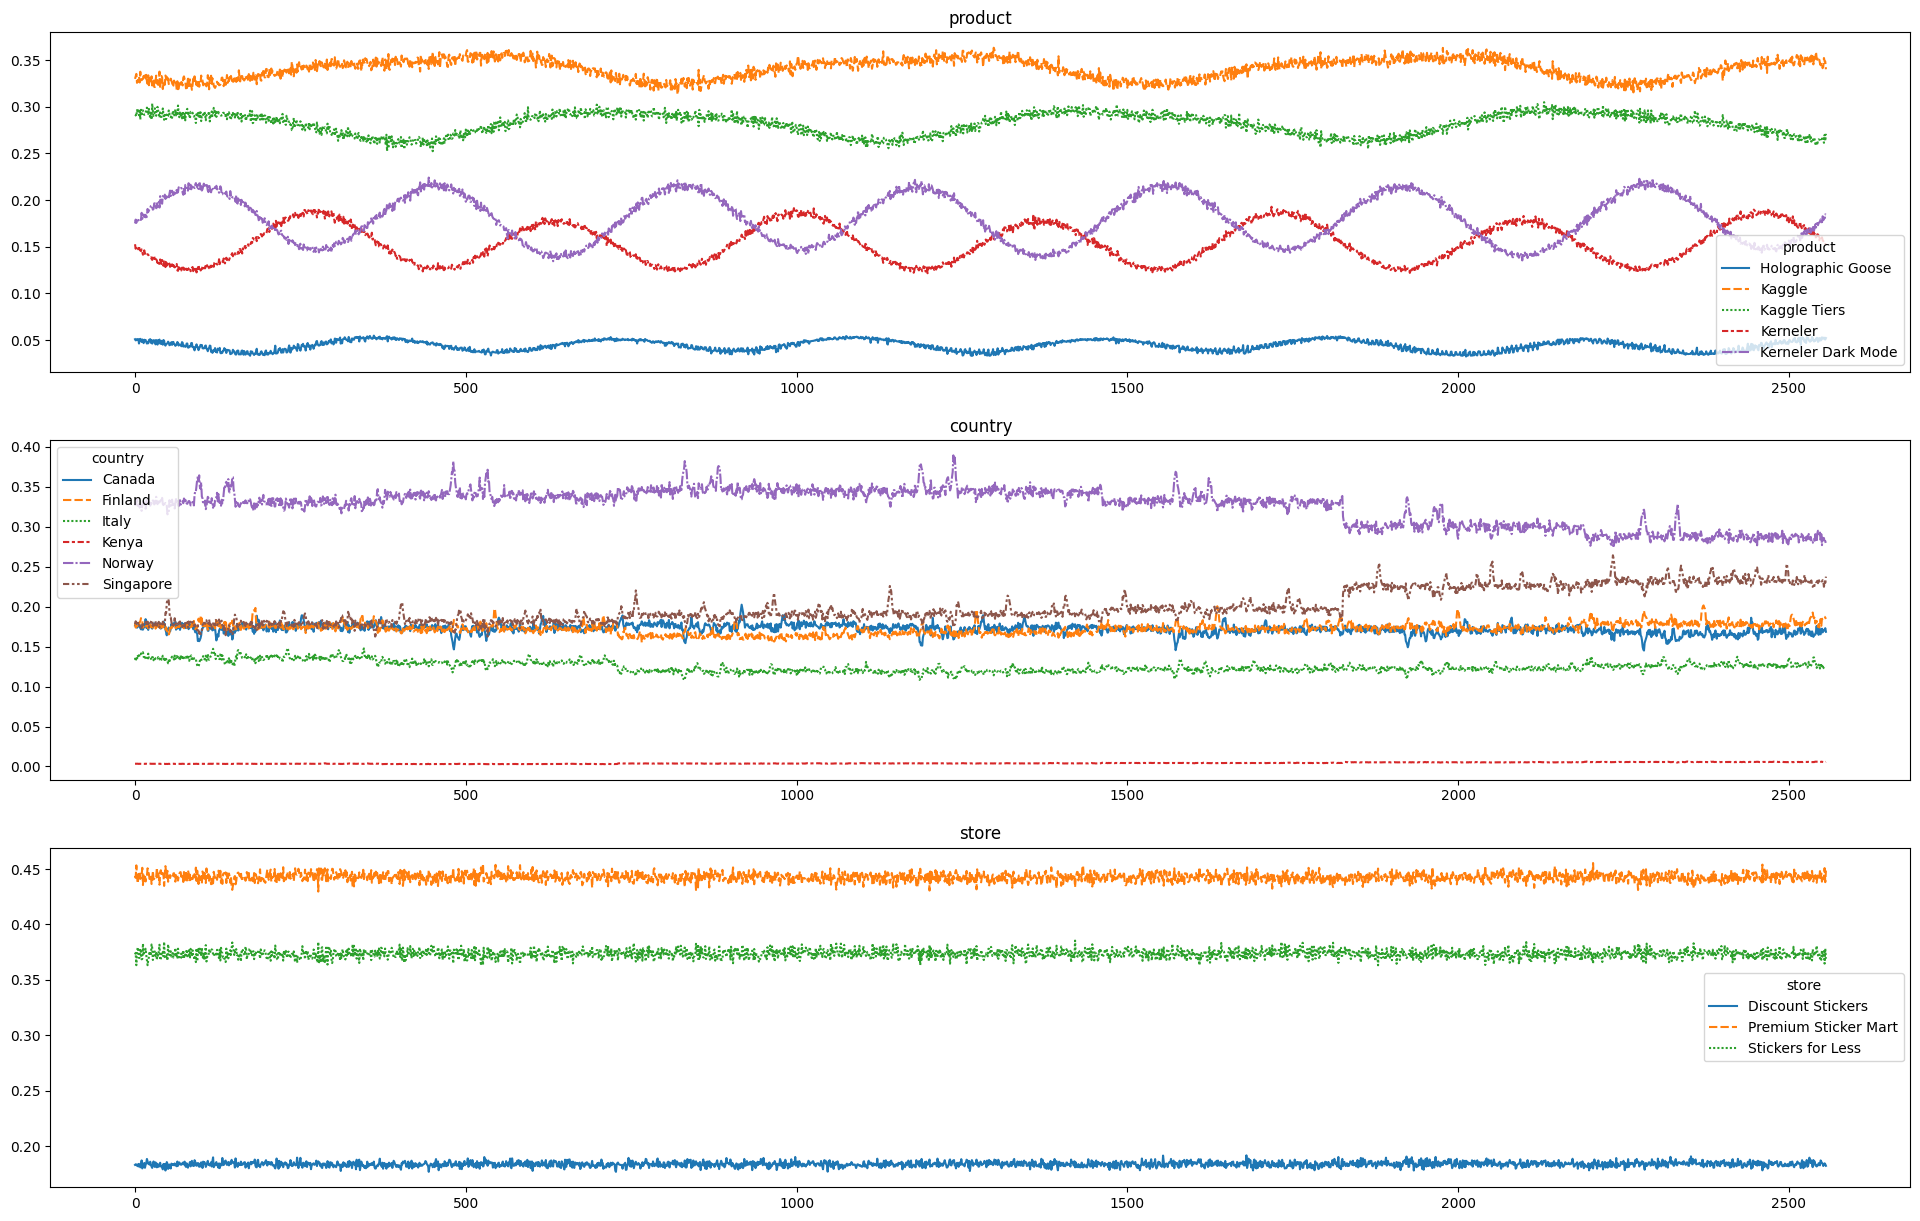

In [13]:
fig, ax = plt.subplots(nrows=3)
fig.set_size_inches(24,15)
for n, column in enumerate(['product', 'country', 'store']):
    ax[n].set_title(column)
    sold_per_column = train.groupby(['date', column])["num_sold"].sum().reset_index().pivot(index="date", columns=column, values='num_sold').reset_index(drop=True)
    sold_fractions = sold_per_column.divide(sold_per_column.sum(axis=1), axis=0)
    sns.lineplot(data=sold_fractions, ax=ax[n])

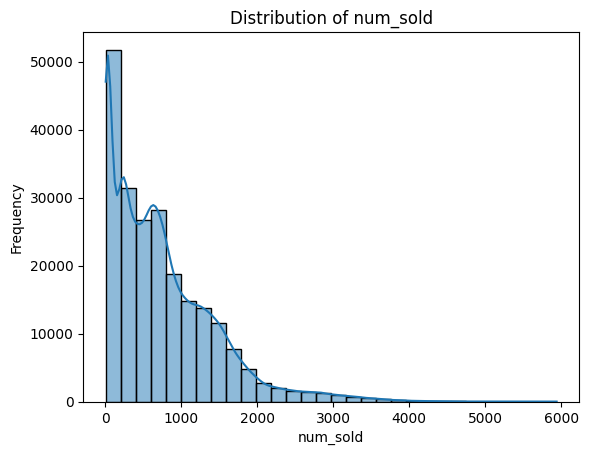

In [45]:
sns.histplot(train['num_sold'], kde=True, bins=30)
plt.title("Distribution of num_sold")
plt.xlabel("num_sold")
plt.ylabel("Frequency")
plt.show()

# Data Processing

In [66]:
train = pd.read_csv("/kaggle/input/playground-series-s5e1/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s5e1/test.csv")
sub = pd.read_csv("/kaggle/input/playground-series-s5e1/sample_submission.csv")

In [4]:
def data_processing(df):
    df.dropna(inplace=True, ignore_index=True)
    df.reset_index(drop=True, inplace=True)

    df.drop('id', inplace = True, axis =1)
    
    df['date'] = pd.to_datetime(df['date'])

    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['dayofweek'] = df['date'].dt.dayofweek
    df['dayofmonth'] = df['date'].dt.day
    df['dayofyear'] = df['date'].dt.dayofyear
    df['weekday'] = df['date'].dt.weekday
    df['year_sin'] = np.sin(2 * np.pi * df['year'])
    df['year_cos'] = np.cos(2 * np.pi * df['year'])
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

    return df

train = data_processing(train)
test = data_processing(test)

In [5]:
def get_gdp_per_capita(country, year):
    alpha3 = {
        'Canada': 'CAN',
        'Finland': 'FIN',
        'Italy': 'ITA',
        'Kenya': 'KEN',
        'Norway': 'NOR',
        'Singapore': 'SGP'
    }
    url = "https://api.worldbank.org/v2/country/{0}/indicator/NY.GDP.PCAP.CD?date={1}&format=json".format(
        alpha3[country], year)
    response = requests.get(url).json()
    return response[1][0]['value']


gdp = []
for country in train.country.unique():
    row = []
    for year in range(2010, 2017): 
        row.append(get_gdp_per_capita(country, year))
    gdp.append(row)

gdp = np.array(gdp)
gdp /= np.sum(gdp)
rel_gdp_df = pd.DataFrame(gdp, index=train.country.unique(), columns=range(2010, 2017))

train['rel_gdp'] = train.apply(
    lambda s: rel_gdp_df.loc[s.country, s.date.year], axis=1
)
train['log_rel_gdp'] = np.log(train['rel_gdp'])

In [6]:
gdp = []
for country in test.country.unique():
    row = []
    for year in range(2017, 2020): 
        row.append(get_gdp_per_capita(country, year))
    gdp.append(row)

gdp = np.array(gdp)
gdp /= np.sum(gdp)


rel_gdp_df = pd.DataFrame(gdp, index=test.country.unique(), columns=range(2017, 2020))

test['rel_gdp'] = test.apply(
    lambda s: rel_gdp_df.loc[s.country, s.date.year], axis=1
)
test['log_rel_gdp'] = np.log(test['rel_gdp'])

In [7]:
def add_holidays(df):
    df["holiday"] = 0
    
    country_holidays = {
        "Canada": holidays.country_holidays("CA"),
        "Finland": holidays.country_holidays("FI"),
        "Italy": holidays.country_holidays("IT"),
        "Kenya": holidays.country_holidays("KE"),
        "Norway": holidays.country_holidays("NO"),
        "Singapore": holidays.country_holidays("SG"),
    }

    def is_holiday(row):
        country = row["country"]
        date = row["date"]
        if country in country_holidays and date in country_holidays[country]:
            return 1
        return 0

    df["holiday"] = df.apply(is_holiday, axis=1)

    return df

train = add_holidays(train)
test = add_holidays(test)

In [8]:
X = train.drop(columns=['num_sold'])
y = train['num_sold']

categorical_cols = ['country', 'store', 'product']
numerical_cols = ['year', 'month', 'dayofweek', 'holiday']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])


y_log = np.log1p(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_preprocessed = pipeline.fit_transform(X_train)
X_test_preprocessed = pipeline.transform(X_test)

# Model Training

In [26]:
base_models = [
    ('linear', LinearRegression()),
    ('rf', RandomForestRegressor(random_state=42)),
    ('xgb', XGBRegressor(random_state=42))
]

meta_model = XGBRegressor(random_state=42)

stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model)

stacking_regressor.fit(X_train_preprocessed, y_train)

y_pred = stacking_regressor.predict(X_test_preprocessed)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")
print(f"Mean absolute percentage error: {mape}")

```
Mean Squared Error: 5398.320111648467
R-squared Score: 0.9887054343942765
mean absolute percentage error Score: 0.05644635560570621
```

In [14]:
test_preprocessed = pipeline.transform(test)

preds = stacking_regressor.predict(test_preprocessed)

ids = pd.read_csv('/kaggle/input/playground-series-s5e1/sample_submission.csv')['id']
submission = pd.DataFrame({
    'id': ids,
    'num_sold': preds,
})

submission.to_csv('submission_stacking.csv', index=False)

In [62]:
submission

,id,num_sold
0,230130,13.332720
1,230131,29.339167
2,230132,27.559038
3,230133,21.234812
4,230134,22.475395
...,...,...
98545,328675,19.295406
98546,328676,41.054165
98547,328677,37.458603
98548,328678,30.589420
